In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

%matplotlib inline

In [2]:
embeddings = np.load('/home/eamonn/Projects/music-mining/gensim/embeddings_lite.np.npy')
metadata = json.load(open('/home/eamonn/Projects/music-mining/gensim/metadata_lite.json'))

In [3]:
iddict = {}
stdict = {}
sttoid = {}

for i, l in enumerate(metadata[1:]):
    new_l = [l[0].replace("\"", "")] + l[1:]
    iddict[i] = new_l
    stdict[new_l[0]] = new_l
    sttoid[new_l[0]] = i

In [87]:
def find_major_triads():
    keys = []
    for key, value in stdict.items():
        if 'major triad' in value[7]:
            keys.append(key)
    return keys

def find_minor_triads():
    keys = []
    for key, value in stdict.items():
        if 'minor triad' in value[7]:
            keys.append(key)
    return keys

In [88]:
find_minor_triads()

['000100100010',
 '001001000100',
 '010001000010',
 '000010010001',
 '010010001000',
 '000100001001',
 '100001001000',
 '100100010000',
 '001000100001',
 '001000010010',
 '100010000100',
 '010000100100']

In [4]:
timecanonical = json.load(open('./sym40pairs.json'))

In [5]:
len(timecanonical)

2693

In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [7]:
pca = PCA()
red = pca.fit_transform(embeddings)

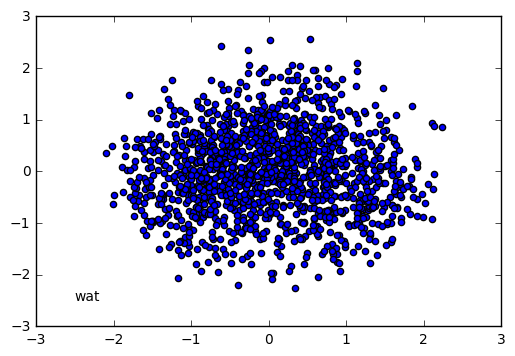

In [15]:
plt.scatter(red[:,0], red[:,1])
plt.text(-2.5,-2.5,)
plt.show()


In [89]:
red.shape

(1426, 2)

In [35]:
!rm ./animframes/*.png

In [36]:
from IPython.display import clear_output

In [55]:
%%time
index = 0 
for timestamp, curst in timecanonical:
    try:
        curid = sttoid[curst]
    except KeyError:
        continue
    
    plt.scatter(red[curid,0], red[curid,1], alpha=0.9)
    name = stdict[curst][7]
    plt.text(-2.5, -2.5, name)
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.axis('off')
    plt.savefig('./animframes/{}.png'.format(index))
    plt.close()
    clear_output(wait=True)
    print("Frame {} rendered".format(index))
    index += 1

Frame 2690 rendered
CPU times: user 4min 51s, sys: 6min 27s, total: 11min 18s
Wall time: 3min 57s


In [39]:
tss = [pair[0] for pair in timecanonical]

In [77]:
len(tss[:index])

2691

In [78]:
index

2691

In [79]:
durs = np.diff(tss)
fns = ['animframes/{}.png'.format(i) for i in range(len(tss[:index]) - 1)]

In [80]:
with open('demux.txt', 'w') as f:
    f.write('ffconcat version 1.0\n')
    for fn, dur in zip(fns, durs):
        f.write('file {}\n'.format(fn))

        f.write('duration {:.8}\n'.format(dur))

In [99]:
!tail demux.txt

file animframes/2685.png
duration 0.14218
file animframes/2686.png
duration 0.14218
file animframes/2687.png
duration 0.14218
file animframes/2688.png
duration 0.14218
file animframes/2689.png
duration 1.13744


In [100]:
!yes | ffmpeg -i demux.txt -i sym40-1.wav -c:a copy -vf fps=25 out.avi

ffmpeg version 3.2.2 Copyright (c) 2000-2016 the FFmpeg developers
  built with gcc 6.2.1 (GCC) 20160830
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-avisynth --enable-avresample --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libass --enable-libbluray --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-libschroedinger --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-netcdf --enable-shared --enable-version3 --enable-x11grab
  libavutil      55. 34.100 / 55. 34.100
  libavcodec     57. 64.101 / 57. 64.101
  libavformat    57. 56.100 / 57. 56.100
  libav

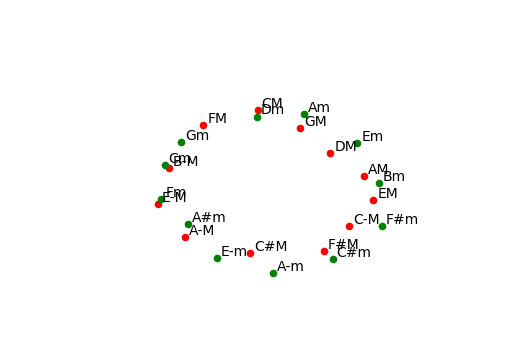

In [101]:
for curst in find_major_triads():
    curid = sttoid[curst]
    x, y = red[curid,0], red[curid,1]
    plt.scatter(x, y,color='red',)
    name = stdict[curst][7].replace(' major triad', 'M')
    plt.text(x+0.05, y+0.05, name)

for curst in find_minor_triads():
    curid = sttoid[curst]
    x, y = red[curid,0], red[curid,1]
    plt.scatter(x, y,color='green')
    name = stdict[curst][7].replace(' minor triad', 'm')
    plt.text(x+0.05, y+0.05, name)


plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.axis('off')

plt.savefig('animframes/overlay.png')

In [105]:
!yes | ffmpeg -i out.avi -i animframes/overlay.png -filter_complex "[1:v]format=argb,geq=r='r(X,Y)':a='0.5*alpha(X,Y)'[zork]; [0:v][zork]overlay" -codec:v libx264 -crf 18 -preset slow -pix_fmt yuv420p overlain.avi

ffmpeg version 3.2.2 Copyright (c) 2000-2016 the FFmpeg developers
  built with gcc 6.2.1 (GCC) 20160830
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-avisynth --enable-avresample --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libass --enable-libbluray --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-libschroedinger --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-netcdf --enable-shared --enable-version3 --enable-x11grab
  libavutil      55. 34.100 / 55. 34.100
  libavcodec     57. 64.101 / 57. 64.101
  libavformat    57. 56.100 / 57. 56.100
  libav